## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('customer_churn.csv')
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


## Data Preprocessing

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [3]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df = df.drop(columns = ['CustomerID'])
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [6]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Subscription Type'] = label_encoder.fit_transform(df['Subscription Type'])
df['Contract Length'] = label_encoder.fit_transform(df['Contract Length'])
df
## Gender
#Female = 0
#Male = 1
##Subscription Type
#Basic = 0
#Premium = 1
#Standard = 2
##Contract Length
#Monthly = 1
#Quarterly = 2
#Annual = 0

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,25,14,4,27,0,1,598,9,1
1,41,0,28,28,7,13,2,1,584,20,0
2,47,1,27,10,2,29,1,0,757,21,0
3,35,1,9,12,5,17,1,2,232,18,0
4,53,0,58,24,9,2,2,0,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,0,33,12,6,21,0,2,947,14,1
64370,37,1,6,1,5,22,2,0,923,9,1
64371,25,1,39,14,8,30,1,1,327,20,1
64372,50,0,18,19,7,22,2,1,540,13,1


In [8]:
df.nunique()

Age                   48
Gender                 2
Tenure                60
Usage Frequency       30
Support Calls         11
Payment Delay         31
Subscription Type      3
Contract Length        3
Total Spend          901
Last Interaction      30
Churn                  2
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

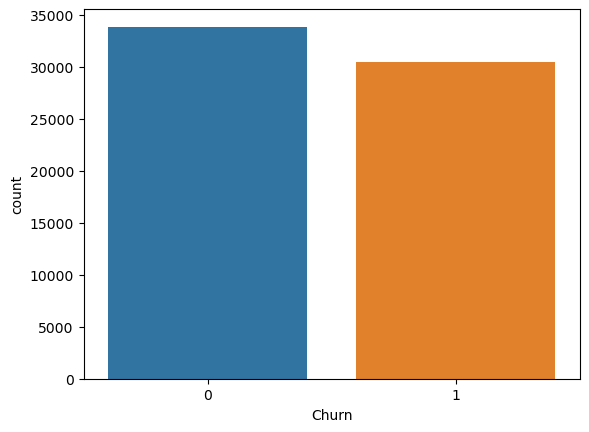

In [9]:
sns.countplot(data = df, x = df['Churn'])

<Figure size 700x700 with 0 Axes>

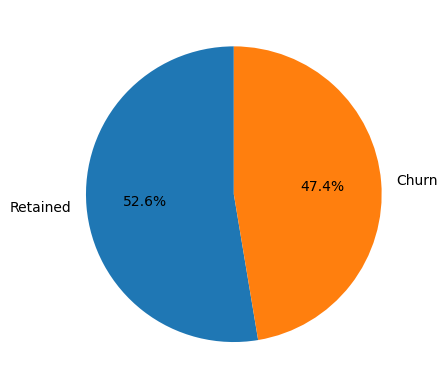

<Figure size 700x700 with 0 Axes>

In [41]:
labels = ['Retained', 'Churn'] # set labels
size = df['Churn'].value_counts() # define the value
plt.pie(size, labels = labels, startangle = 90,  autopct='%1.1f%%')
plt.figure(figsize=(7,7))

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
df.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

## Train Test Spilt

In [42]:
X = df[['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction']]

y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=50)

In [43]:
clf = RandomForestClassifier(n_estimators=100, random_state=50)

In [44]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

In [47]:
y_pred = clf.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 1.00
Confusion Matrix:
 [[16983    16]
 [   33 15155]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16999
           1       1.00      1.00      1.00     15188

    accuracy                           1.00     32187
   macro avg       1.00      1.00      1.00     32187
weighted avg       1.00      1.00      1.00     32187



In [49]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.0 degrees.
